Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [19]:
NAME = "양동훈"
COLLABORATORS = "python"

---

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

# Exercise: Initial Value Problem and Boundary Value Problem
**강좌**: *Numerical Analysis*

**Due**: 2024/12/19

## Problem 1  

Write code to solve the initial value problem (for a scalar variable) using the following numerical methods:  

1. Explicit Euler Method  
2. Second-Order Runge-Kutta Method (Richardson)  
3. Fourth-Order Runge-Kutta Method  

Additionally, use the implemented methods to solve the **paratrooper problem** presented in the lecture notes.  

### Requirements:  
- Implement each method in Python as a separate function.  
- Test your implementations on the paratrooper problem with the given initial conditions and parameters.  
- Compare the numerical solutions by varying the time step ($h$) as follows:  
  - $h = 0.5, 1.0, 2.0, 5.0, 10.0, 15.0$
- Discuss how the choice of time step affects the accuracy and stability of the solutions.  

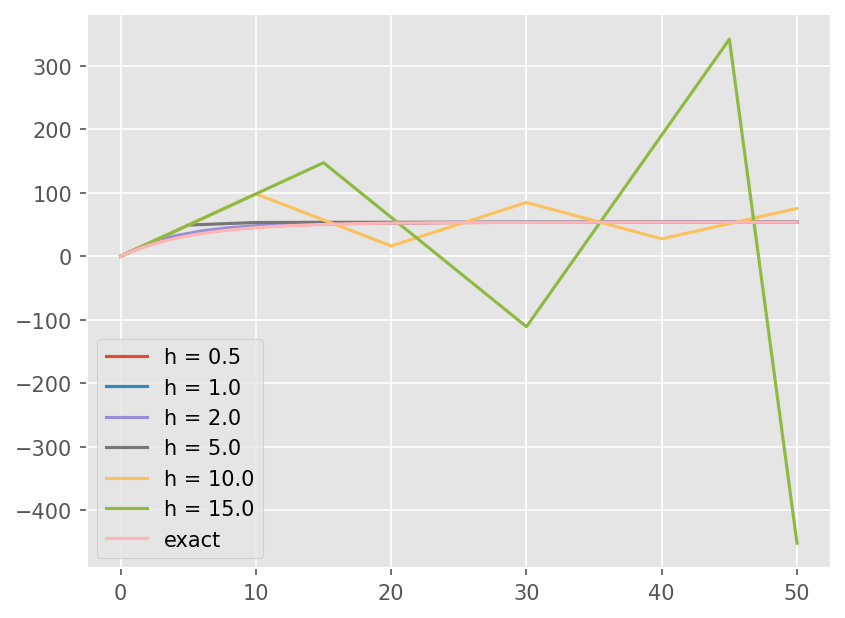

In [21]:
# Write Explicit Euler
def explicit_euler(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h)
    t = np.insert(t, len(t), tspan[1])

    y = np.zeros(len(t))
    y[0] = y0

    for i, ti in enumerate(t) :
        if i < len(t) - 1 : 
            y[i+1] = y[i] + h*f(ti, y[i])

    return t, y

# Paratrooper problem
m, c, g = 68.1, 12.5, 9.81
t = np.linspace(0,50,100)
# function
def f(t, v):
    return g - c/m*v
def exact(t):
    return g*m/c*(1-np.exp(-(c/m)*t))

h = np.array([0.5, 1.0, 2.0, 5.0, 10.0, 15.0])
for i in h :
    eet, eey = explicit_euler(f, (0, 50), 0, i)
    plt.plot(eet, eey, label=f"h = {i}")

plt.plot(t, exact(t), label = 'exact')
plt.legend()
plt.grid(True)
plt.show()


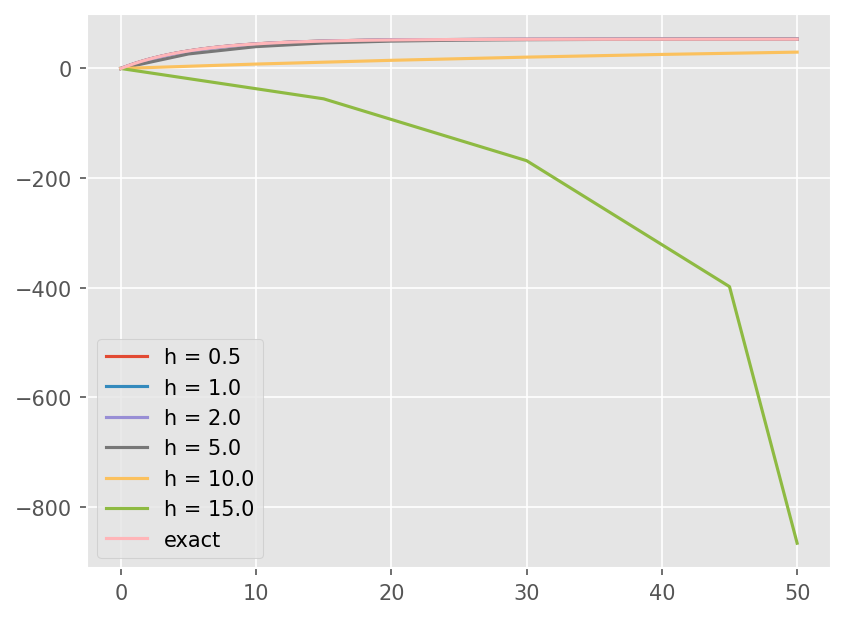

In [22]:
# Write 2nd-order Runge Kutta
def runge_kutta2(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h)
    t = np.insert(t, len(t), tspan[1])

    y = np.zeros(len(t))
    y[0] = y0

    for i in range(len(t) - 1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 3/4 * h, y[i] + 3/4 * k1 * h)
        y[i + 1] = y[i] + h * (k1 + 2 * k2) / 3
    return t, y

# Paratrooper problem
m, c, g = 68.1, 12.5, 9.81
t = np.linspace(0,50,100)
# function
def f(t, v):
    return g - c/m*v
def exact(t):
    return g*m/c*(1-np.exp(-(c/m)*t))

h = np.array([0.5, 1.0, 2.0, 5.0, 10.0, 15.0])
for i in h :
    r2t, r2y = runge_kutta2(f, (0, 50), 0, i)
    plt.plot(r2t, r2y, label=f"h = {i}")
    plt.grid(True)

plt.plot(t, exact(t), label = 'exact')
plt.legend()
plt.show()

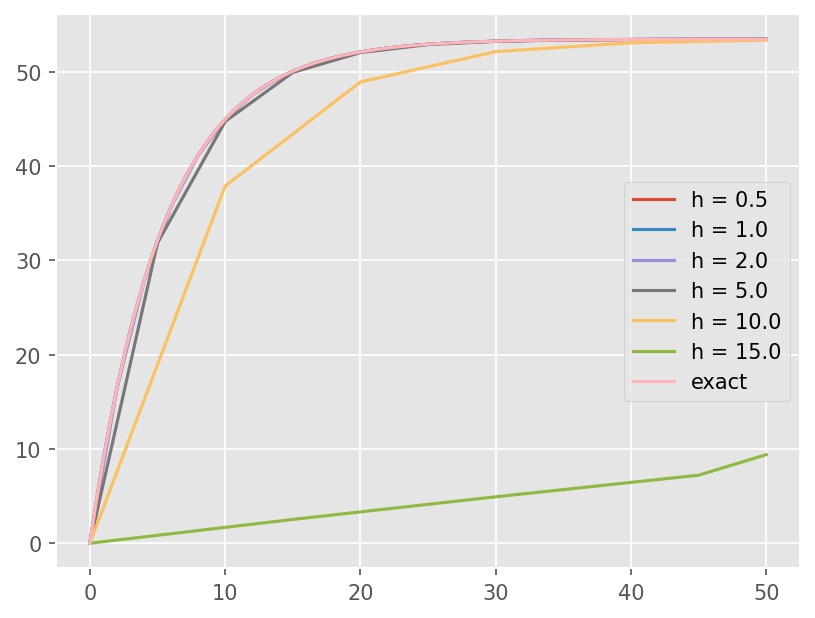

In [23]:
# Write 4th-order Runge Kutta
def runge_kutta4(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h)
    t = np.insert(t, len(t), tspan[1])

    y = np.zeros(len(t))
    y[0] = y0

    for i in range(len(t) - 1):
            k1 = f(t[i], y [i])
            k2 = f(t[i] + h / 2, y[i] + h * k1 / 2)
            k3 = f(t[i] + h / 2, y[i] + h * k2 / 2)
            k4 = f(t[i] + h, y[i] + h * k3)
        
            y[i+1] = y[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return t, y

# Paratrooper problem
t = np.linspace(0,50,100)
m, c, g = 68.1, 12.5, 9.81

# function
def f(t, v):
    return g - c/m*v
def exact(t):
    return g*m/c*(1-np.exp(-(c/m)*t))

h = np.array([0.5, 1.0, 2.0, 5.0, 10.0,15.0])
for i in h :
    r4t, r4y = runge_kutta4(f, (0, 50), 0, i)
    plt.plot(r4t, r4y, label=f"h = {i}")

plt.plot(t, (exact(t)), label = 'exact')
plt.legend()
plt.show()


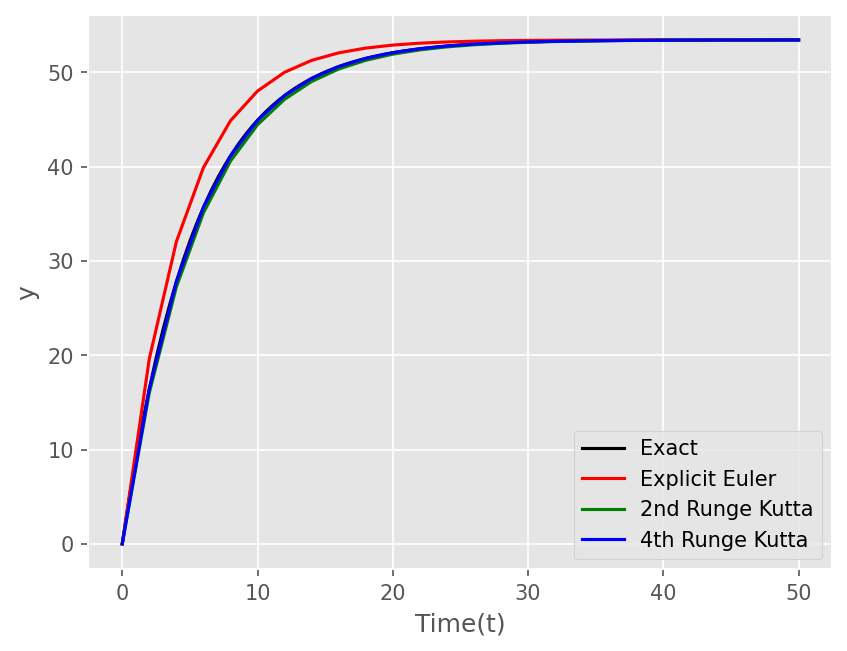

In [24]:
import numpy as np

# Paratrooper problem
m, c, g = 68.1, 12.5, 9.81

# function
def f(t, v):
    return g - c/m*v

# Time step
h = 2
eet, eey = explicit_euler(f, (0, 50), 0, h)
r2t, r2y = runge_kutta2(f, (0, 50), 0, h)
r4t, r4y = runge_kutta4(f, (0, 50), 0, h)

# Verification
# Plot exact solution and numerical solution
# 엄밀해 계산 함수
t = np.linspace(0,50,100)
def exact(t):
    return g*m/c*(1-np.exp(-(c/m)*t))
plt.plot(t, (exact(t)), label ='Exact', color = 'black')
plt.plot(eet, eey, label = 'Explicit Euler', color ='red')
plt.plot(r2t, r2y, label = '2nd Runge Kutta', color = 'green')
plt.plot(r4t, r4y, label = '4th Runge Kutta', color ='blue')
plt.xlabel('Time(t)')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

#Explicit_euler와 2차 runge_kutta는 -2<lambda*h<0인 구간에서 stability하고 4차 runge_kutta는 앞에 두 함수보다는 더 넓은 범위에서 stability하다 약 -3<lambda*h<0.2 정도이다.

In [25]:
# Check your solution
assert r4y[25] - 53.439347 < 1e-6

## Problem 2  

Write code to solve the initial value problem (for a vector variable) using the following numerical methods:  

1. Explicit Euler Method  
2. Second-Order Runge-Kutta Method (Richardson)  
3. Fourth-Order Runge-Kutta Method  

Use the implemented methods to solve the **spring-mass problem** described in the lecture notes.  

### Requirements:  
- Implement each method in Python as a separate function to handle vector-valued problems.  
- Apply the methods to solve the spring-mass problem with the given initial conditions and parameters. 
- Compare the numerical solutions by varying the time step ($h$) as follows:  
  - $h = 0.01, 0.05, 0.1, 0.2$
- Compare the results for the different methods, analyzing accuracy and stability.  

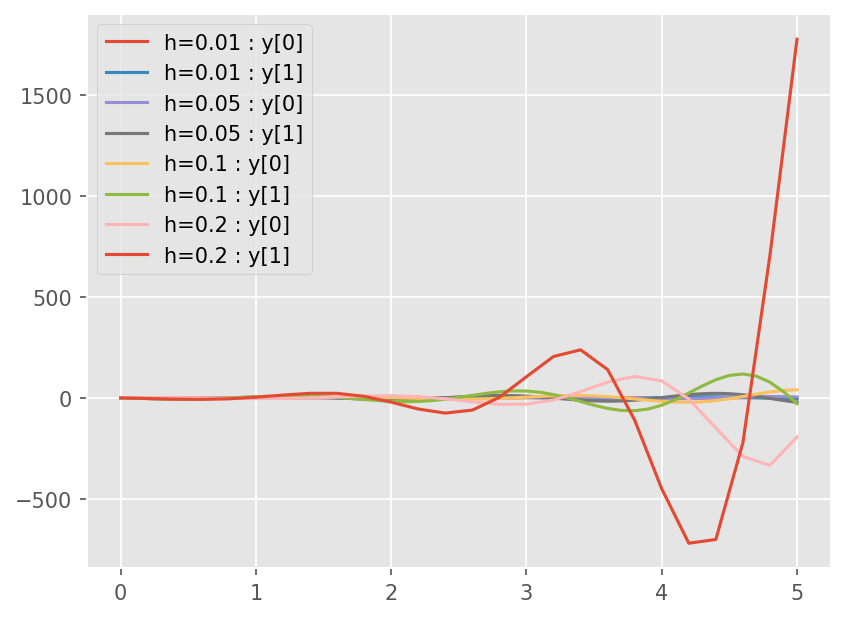

In [26]:
# Write Explicit Euler (for vector y)
def explicit_euler(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h)
    t = np.insert(t, len(t), tspan[1])    
    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0

    for i in range(len(t) - 1):
            y[:, i+1] = y[:, i] + h*f(t[i], y[:, i])


    return t, y

# Paratrooper problem
m, k = 1, 16

# Derivative
def f(t, y):
    return np.array([y[1], -k/m*y[0]])

# Initial condition
y0 = np.array([1, 0])

h = np.array([0.01, 0.05, 0.1, 0.2])


for i in h :
    eet, eey = explicit_euler(f,(0,5),y0, i)
    plt.plot(eet, eey[0], label = f'h={i} : y[0]')
    plt.plot(eet, eey[1],label = f'h={i} : y[1]')

plt.legend()
plt.grid(True)
plt.show()

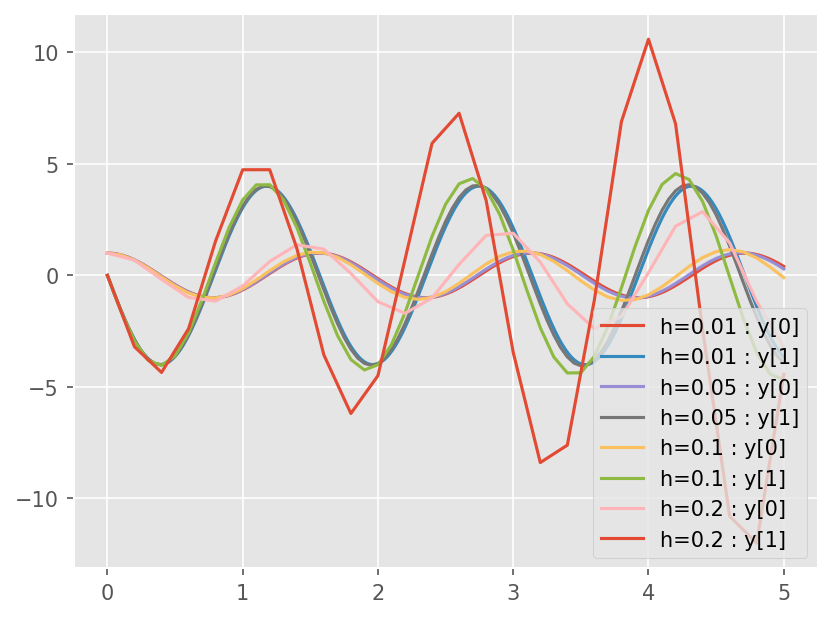

In [27]:
# Write 2nd-order Runge Kutta (for vector y)
def runge_kutta2(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h)
    t = np.insert(t, len(t), tspan[1])    
    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0

    for i in range(len(t) - 1):
        k1 = f(t[i], y[:, i])
        k2 = f(t[i] + 3/4 * h, y[:, i] + 3/4 * k1 * h)
        y[:, i + 1] = y[:, i] + h * (k1 + 2 * k2) / 3

    return t, y

m, k = 1, 16

# Derivative
def f(t, y):
    return np.array([y[1], -k/m*y[0]])

# Initial condition
y0 = np.array([1, 0])

h = np.array([0.01, 0.05, 0.1, 0.2])

for i in h :
    r2t, r2y = runge_kutta2(f,(0,5),y0, i)
    plt.plot(r2t, r2y[0], label = f'h={i} : y[0]')
    plt.plot(r2t, r2y[1],label = f'h={i} : y[1]')

plt.legend()
plt.grid(True)
plt.show()

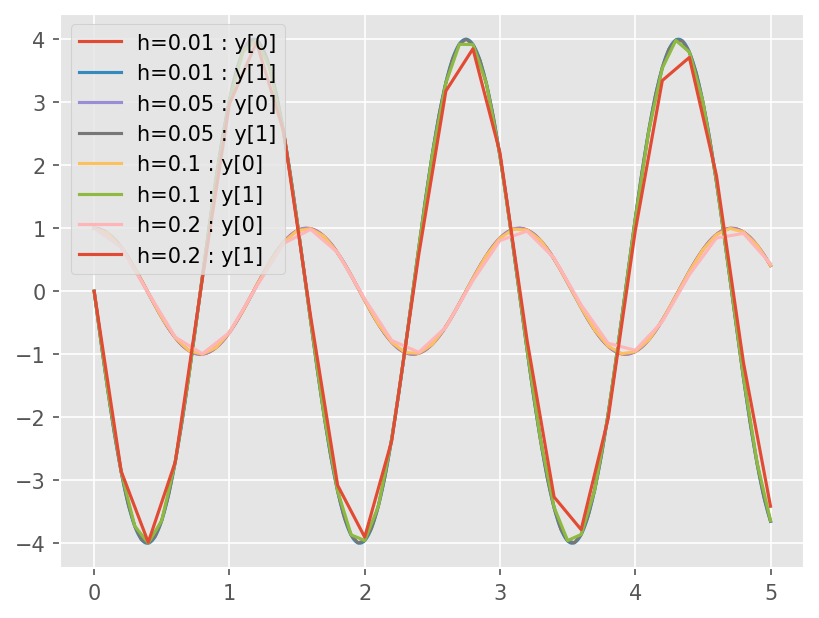

In [ ]:
# Write 4th-order Runge Kutta (for vector y)
def runge_kutta4(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h)
    t = np.insert(t, len(t), tspan[1])    
    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0
    
    for i in range(len(t) - 1):
            k1 = f(t[i], y[:, i])
            k2 = f(t[i] + h / 2, y[:, i] + h * k1 / 2)
            k3 = f(t[i] + h / 2, y[:, i] + h * k2 / 2)
            k4 = f(t[i] + h, y[:, i] + h * k3)
        
            y[:, i+1] = y[:, i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return t, y 

m, k = 1, 16

# Derivative
def f(t, y):
    return np.array([y[1], -k/m*y[0]])

# Initial condition
y0 = np.array([1, 0])

h = np.array([0.01, 0.05, 0.1, 0.2])

for i in h :
    r4t, r4y = runge_kutta4(f,(0,5),y0, i)
    plt.plot(r4t, r4y[0], label = f'h={i} : y[0]')
    plt.plot(r4t, r4y[1],label = f'h={i} : y[1]')

plt.legend()
plt.grid(True)
plt.show()

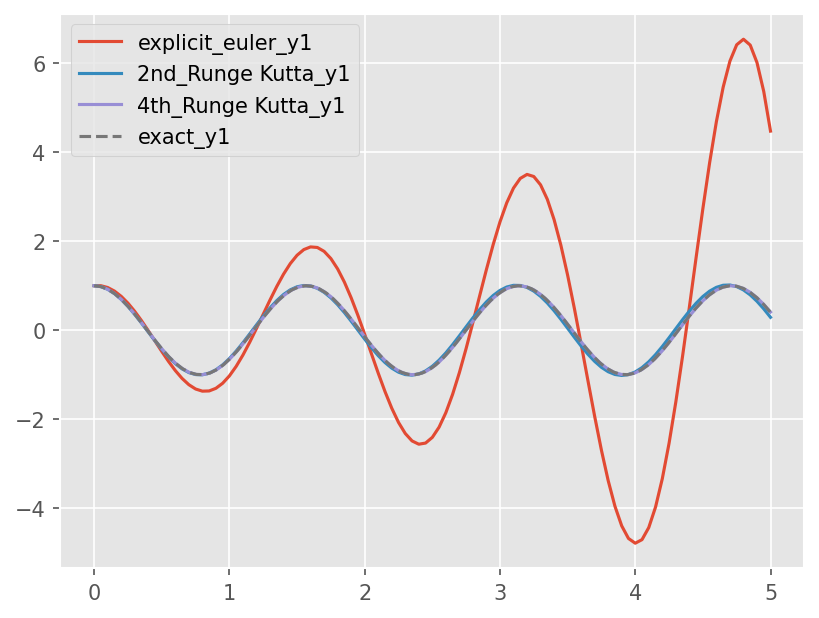

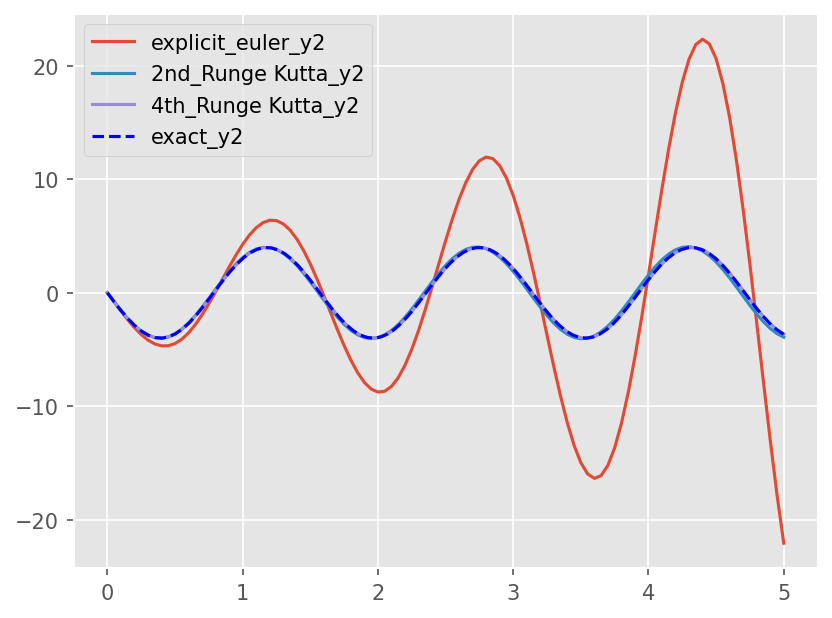

In [29]:
# Paratrooper problem
from scipy.integrate import solve_ivp
m, k = 1, 16

# Derivative
def f(t, y):
    return np.array([y[1], -k/m*y[0]])

# Initial condition
y0 = np.array([1, 0])

# Time step
h = 0.05
eet, eey = explicit_euler(f, (0, 5), y0, h)
r2t, r2y = runge_kutta2(f, (0, 5), y0, h)
r4t, r4y = runge_kutta4(f, (0, 5), y0, h)

t_span = (0,5)
t_eval = np.linspace(0,5,100)

# 정확한 해의 값을 구하기
sol = solve_ivp(f,t_span,y0,t_eval=t_eval)
# Verification
# Plot exact solution and numerical solution
plt.plot(eet, eey[0], label='explicit_euler_y1')
plt.plot(r2t, r2y[0], label='2nd_Runge Kutta_y1')
plt.plot(r4t, r4y[0], label='4th_Runge Kutta_y1')
plt.plot(sol.t,sol.y[0], label = 'exact_y1',linestyle = '--')
plt.legend()
plt.show()

plt.plot(eet, eey[1], label='explicit_euler_y2')
plt.plot(r2t, r2y[1], label='2nd_Runge Kutta_y2')
plt.plot(r4t, r4y[1], label='4th_Runge Kutta_y2')
plt.plot(sol.t,sol.y[1], label ='exact_y2', color ='blue',linestyle = '--')
plt.legend()
plt.show()

#4차 Runge Kutta  방식이 실제 값에 제일 비슷함을 알 수 있다. 


In [30]:
# Check your solution
assert r4y[0, 100] - 0.408303 < 1e-6

## Problem 3  

A forced damped spring-mass system is described by the following nonlinear ordinary differential equation of motion:  

$$
m \frac{d^2 x}{dt^2} + a \left| \frac{dx}{dt} \right| \frac{dx}{dt} + kx = F_o \sin (\omega t)
$$  

where:  
- $x(t)$: Displacement from equilibrium.  
- $t$: Time.  
- $m = 2 \, \text{kg} $: Mass.  
- $ a = 5 \, \text{N}/(\text{m/s})^2 $: Damping coefficient (nonlinear air damping).  
- $ k = 6 \, \text{N/m} $: Spring stiffness.  
- $F_o = 2.5 \, \text{N} $: Amplitude of the forcing function.  
- $ \omega = 0.5 \, \text{rad/sec} $: Angular frequency of the forcing function.  

### Initial Conditions  
- Initial velocity: $ \frac{dx}{dt} = 0 \, \text{m/s} $.  
- Initial displacement: $ x = 1 \, \text{m} $.  

### Task  
Solve the equation numerically using the **4th-order Runge-Kutta method** over the time period $0 \leq t \leq 15 \, \text{s} $.  


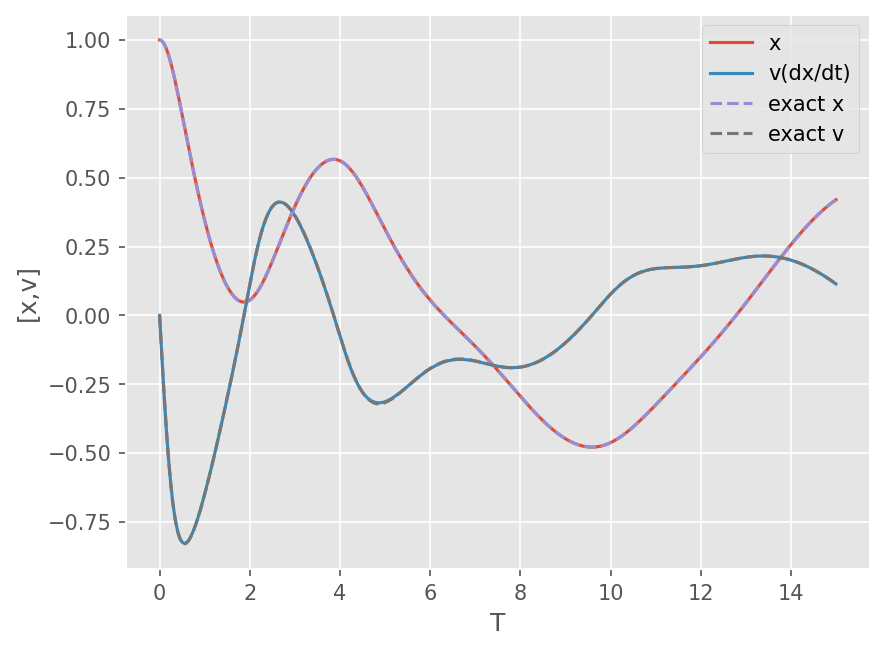

In [31]:
# YOUR CODE HERE
m = 2 #kg
a = 5 #N/(m/s)^2
k = 6 #N/m
Fo = 2.5 #N
w = 0.5 #rad/s
x0 = 1 #m
v0 = 0 #m/s

y0 = np.array([x0,v0])

def f(t, y):
    return np.array([y[1],1/m*(Fo*np.sin(w*t)-a*abs(y[1])*y[1]-k*y[0])])

def runge_kutta4(f, tspan, y0, h):
    """
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h)
    t = np.insert(t, len(t), tspan[1])    
    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0
    
    for i in range(len(t) - 1):
            k1 = f(t[i], y[:, i])
            k2 = f(t[i] + h / 2, y[:, i] + h * k1 / 2)
            k3 = f(t[i] + h / 2, y[:, i] + h * k2 / 2)
            k4 = f(t[i] + h, y[:, i] + h * k3)
        
            y[:,i+1] = y[:,i] + h*(k1 + 2*k2 + 2*k3 + k4)/6

    return t, y

t_span = (0,15)
t_eval = np.linspace(0,15,1000)

# 정확한 해의 값을 구하기
sol = solve_ivp(f,t_span,y0,t_eval=t_eval)

r4t, r4y = runge_kutta4(f,(0,15),y0, 0.05)

# Verification
# Plot exact solution and numerical solution
plt.plot(r4t,r4y[0], label = 'x')
plt.plot(r4t,r4y[1], label = 'v(dx/dt)')
plt.plot(sol.t,sol.y[0] ,linestyle = '--', label = 'exact x')
plt.plot(sol.t,sol.y[1],linestyle = '--', label = 'exact v')
plt.xlabel('T')
plt.ylabel('[x,v]')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
# Check your solution
assert r4y[0, 100] - 0.711351 < 1e-6

## Problem 4
Repeat the boundary value problem (BVP) example provided in the lecture notes using the **shooting method**. Implement the **4th-order Runge-Kutta method** instead of using the `solve_ivp` function.  

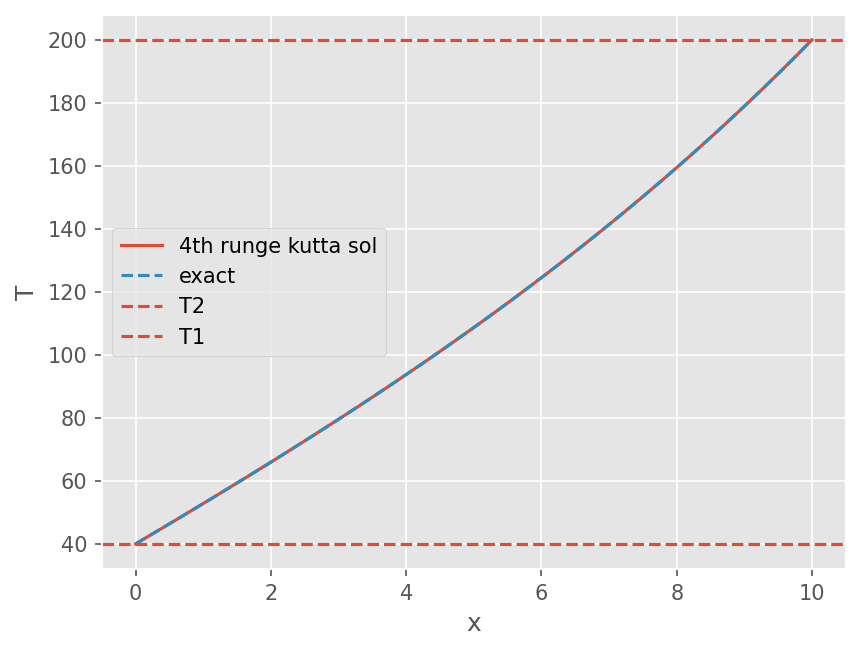

In [33]:
from scipy.optimize import root_scalar

# Constants
Ta, T1, T2 = 20, 40, 200
h = 0.01

# derivative function
def dydx(t, y):
    # y[0], y[1] : T and z
    return np.array([y[1], h*(y[0] - Ta)])

# YOUR CODE HERE
def runge_kutta4(f, tspan, y0, h):
    """
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h)
    t = np.insert(t, len(t), tspan[1])    
    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0
    
    for i in range(len(t) - 1):
            k1 = f(t[i], y[:, i])
            k2 = f(t[i] + h / 2, y[:, i] + h * k1 / 2)
            k3 = f(t[i] + h / 2, y[:, i] + h * k2 / 2)
            k4 = f(t[i] + h, y[:, i] + h * k3)
        
            y[:,i+1] = y[:,i] + h*(k1 + 2*k2 + 2*k3 + k4)/6

    return t, y

def obj(z):
    t, y = runge_kutta4(dydx, (0, 10), [T1, z], h)
    return y[0][-1] - T2

root = root_scalar(obj, bracket=[0,20]) #구간은 강의노트에서 예측한 값으로 사용 예측과정은 생략함.
z0_correct = root.root

t, y = runge_kutta4(dydx, (0,10),[T1,z0_correct],h)

def exact(x):
    return 73.4523*np.exp(0.1*x) - 53.4523*np.exp(-0.1*x) + 20

x = np.linspace(0, 10, 101)

plt.plot(t, y[0], label = '4th runge kutta sol')
plt.plot(x, exact(x), linestyle = '--', label = 'exact')
plt.axhline(200, label = 'T2', linestyle ='--')
plt.axhline(40, label = 'T1', linestyle = '--')
plt.legend()
plt.xlabel('x')
plt.ylabel('T')
plt.grid(True)
plt.show()


In [34]:
# Check your solution
assert y[1, 1000] - 21.932798 < 1e-6

## Problem 5
The boundary layer velocity profile can be obtained by solving the Blasius equation:  

$$
2 f''' +f f'' =0
$$

### Boundary Conditions 
- $f(0) = 0, f'(0)=0$
- $f'(\infty)=1$

Using the shooting method, solve this problem by assuming the initial condition of $f''(0)$.

### Tasks  
1. **Problem Setup**:  
   - Solve the equation using the **shooting method** on $x\in[0, 10]$.  
   - Assume an initial guess for $f''(0)$ and iteratively refine it to satisfy the boundary condition $f'(10) = 1$.   

2. **Analysis**:  
   - Compute and plot the velocity profile $f'(x)$.  
   - Determine the boundary layer thickness, defined as the location where $f'(x)$ reaches 99% of the free-stream velocity (i.e., $f'(x) = 0.99$).  

0.33205733720462655
자유류 속도에 99%가 되는 지점  x = 4.900000000001144입니다.


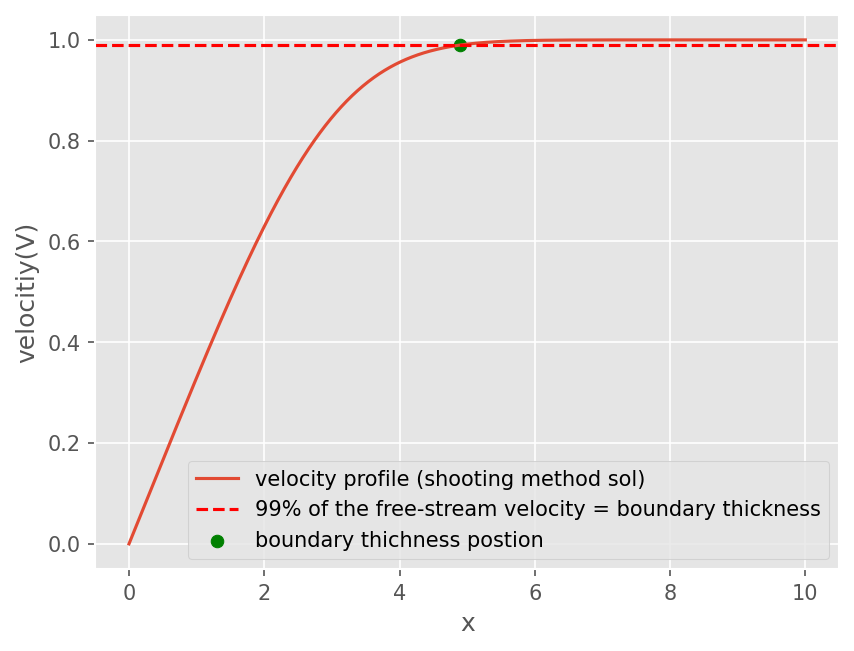

In [37]:
# YOUR CODE HERE
from scipy.optimize import root_scalar
from matplotlib import pyplot as plt
import numpy as np


def f(t, y):
    return np.array([y[1],y[2], -0.5*y[0]*y[2]])

# YOUR CODE HERE
def runge_kutta4(f, tspan, y0, h):
    """
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h)
    t = np.insert(t, len(t), tspan[1])    
    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0
    
    for i in range(len(t) - 1):
            k1 = f(t[i], y[:, i])
            k2 = f(t[i] + h / 2, y[:, i] + h * k1 / 2)
            k3 = f(t[i] + h / 2, y[:, i] + h * k2 / 2)
            k4 = f(t[i] + h, y[:, i] + h * k3)
        
            y[:,i+1] = y[:,i] + h*(k1 + 2*k2 + 2*k3 + k4)/6

    return t, y

def obj(z):
    t, y = runge_kutta4(f, (0, 10), [0,0, z], h=0.01)
    return y[1][-1] - 1

root = root_scalar(obj, bracket=[0,10]) #f''(0) = 0, 10으로 가정했을 때 그 사이에 해가 존재할 것으로 추측
z0_correct = root.root
print(z0_correct)
def boundary_layer_obj(x):
    """
    y[1] - 0.99 = 0을 만족하는 x를 찾는 함수
    """
    _, y = runge_kutta4(f, (0, x), [0, 0, z0_correct], h=0.01)
    return y[1, -1] - 0.99

# root_scalar로 경계층 두께 계산
boundary_layer_sol = root_scalar(boundary_layer_obj, bracket=[0, 5])
boundary_layer_thickness = boundary_layer_sol.root

print(f"자유류 속도에 99%가 되는 지점  x = {boundary_layer_thickness}입니다.")

x, f = runge_kutta4(f, (0, 10), [0,0, z0_correct], h=0.01)

# Plot numerical solution save the result as f
# ex) x, f = runge_kutta4
plt.plot(x, f[1], label = 'velocity profile (shooting method sol)')
plt.axhline(0.99, label = '99% of the free-stream velocity = boundary thickness',linestyle ='--',color = 'red')
plt.scatter(boundary_layer_thickness,0.99, label = "boundary thichness postion", color = 'green')
plt.xlabel('x')
plt.ylabel('velocitiy(V)')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Check your solution
assert np.linalg.norm(f[:, 100] - [0.16557173, 0.32978003, 0.32300712]) < 1e-6